In [61]:
# importing libraries

import numpy as np 
import pandas as pd
import seaborn as sns


import matplotlib  
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# loading data

df = pd.read_csv("D:\Downloads Alpha\movies.csv")

In [62]:
# sneek peek into data

df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [63]:
# looking for missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [64]:
# Dtypes of columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [65]:
# dropping NaN values from df. (as shown in cell 63)
df = df.dropna()

In [66]:
# transforming float values into integers

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [68]:
# using slicing and indexing to add a year corrected column with only month

df['yearcorrect']=df['released'].astype(str).str[:4]

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [70]:
# Sorting values in a descending way

df =df.sort_values(by=['gross'], inplace = False, ascending = False)

In [71]:
# imporves visualisation for me

pd.set_option('display.max_rows', None)

In [72]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [97]:
# drop duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,7
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,5
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,7
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,7
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,5


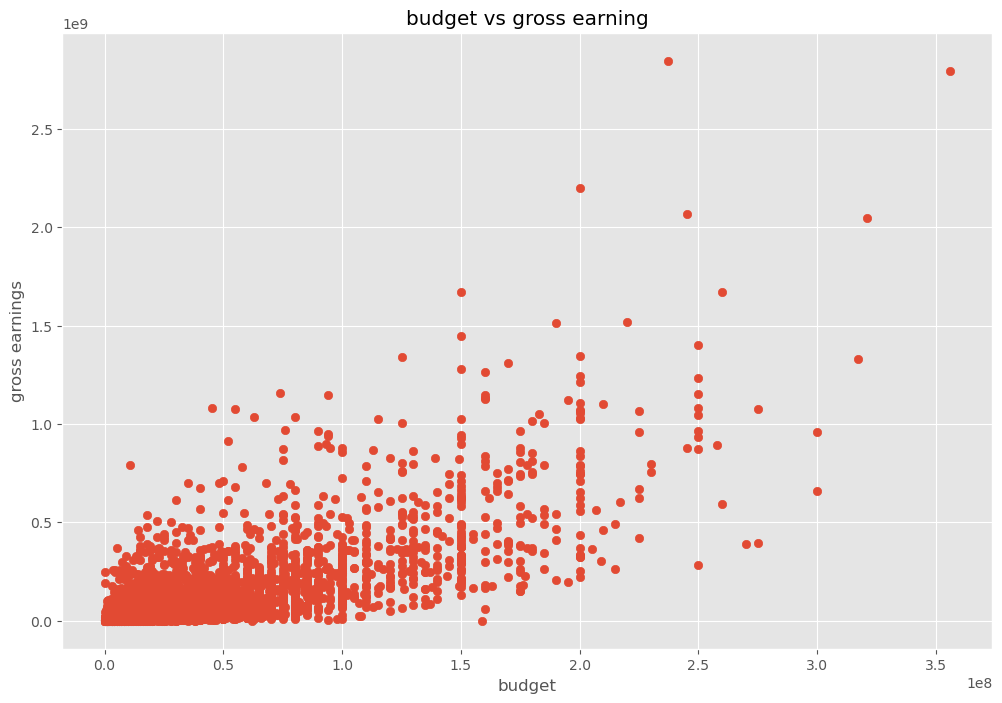

In [75]:
# scatter plot with budget vs gross earnings

plt.scatter(x=df['budget'],
           y=df['gross'])
plt.title('budget vs gross earning')
plt.xlabel('budget')
plt.ylabel('gross earnings')
plt.show()

In [76]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


<Axes: xlabel='budget', ylabel='gross'>

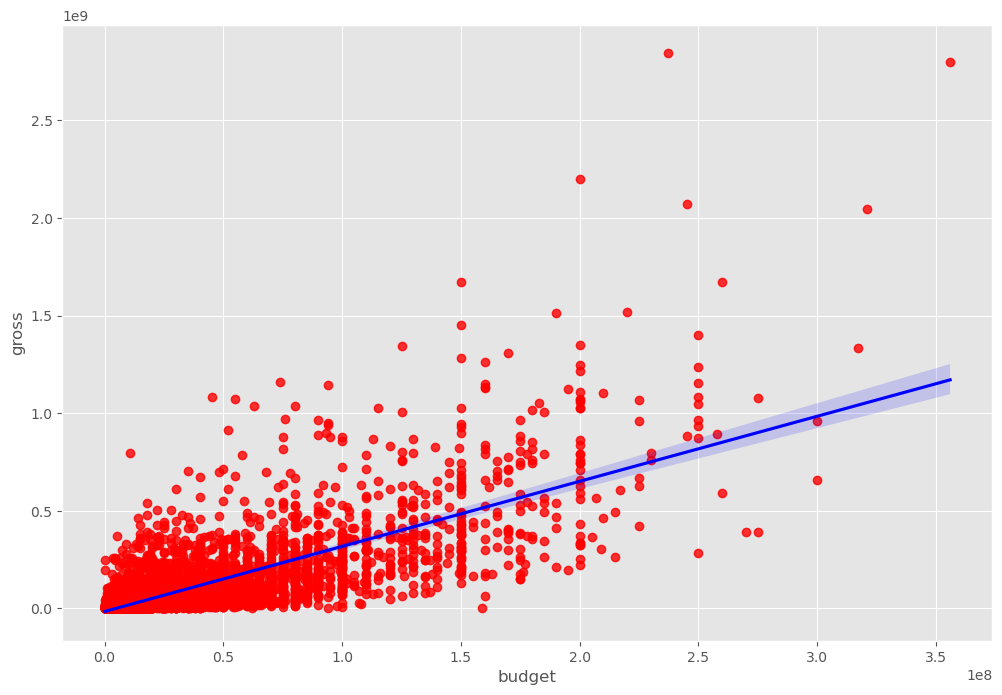

In [77]:
# plot regression line of  budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data = df, scatter_kws ={'color':'red'},
           line_kws={'color':'blue'})

In [78]:
# looking at correlation 

In [79]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13040\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13040\319825338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


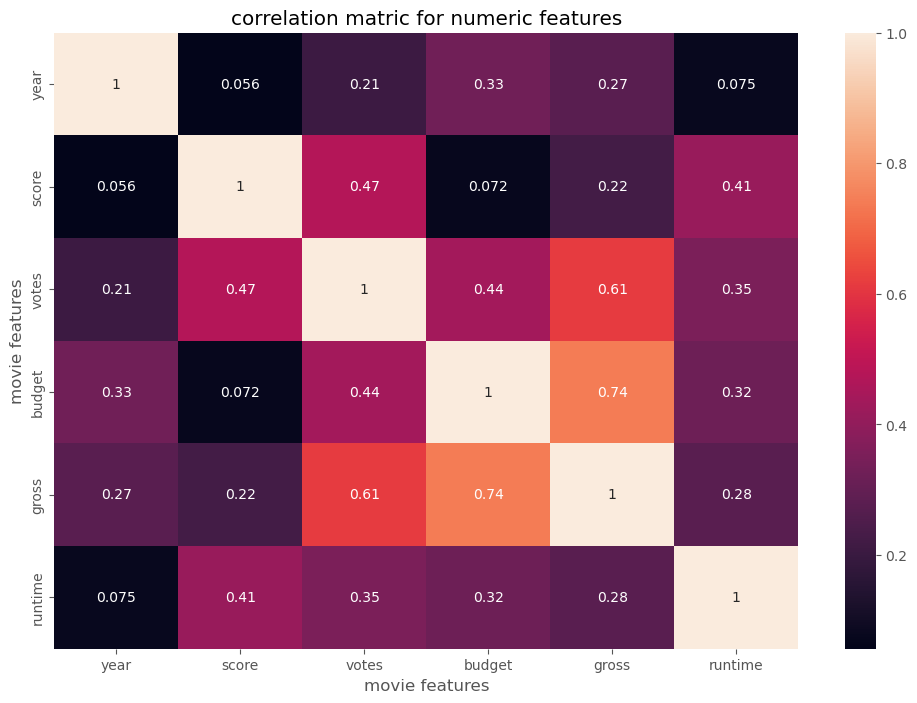

In [80]:
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot= True)

plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [81]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [82]:
# changing object types into cetgories to allow all values to be included in correlation matrix
df_numerised = df

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name]= df_numerised[col_name].astype('category')
        df_numerised[col_name]= df_numerised[col_name].cat.codes

In [98]:
df_numerised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,7
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,5
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,7
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,7
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,5


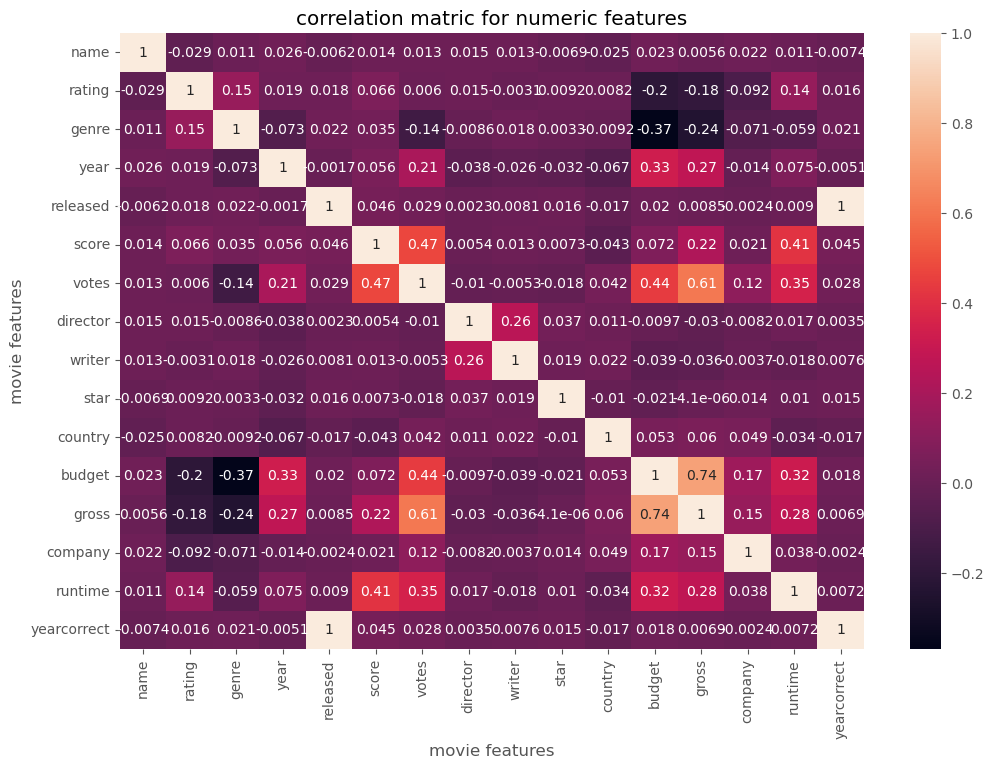

In [84]:
corr_matrix = df_numerised.corr(method='pearson')

sns.heatmap(corr_matrix, annot= True)

plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')

plt.show()

In [99]:
df_numerised.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.007371
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.015532
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.021306
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.005073
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.996181


In [100]:
# forming correlation pairs 

corr_matrix = df_numerised.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [102]:
# sorting correlation pairs 
sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
released     yearcorrect    0.996181
yearcorrect  released       0.996181
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
votes        score          0.474256
score        votes          0.474256
budget       votes          0.439675
votes        budget         0.439675
runtime      score          0.414068
s

In [105]:
# filtering correlation pairs with values greater than 0.5 which resembles high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5].sort_values(ascending = True)

In [106]:
high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       0.996181
released     yearcorrect    0.996181
yearcorrect  yearcorrect    1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
name         name           1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
rating       rating         1.000000
director     director       1.000000
votes        votes          1.000000
dtype: float64

In [107]:
# Gross and votes are most correlated 

In [ ]:
##### END #########